In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

In [2]:
help(ss.import_data)

Help on function import_data in module PySulfSat.import_data:

import_data(filename, sheet_name=None, Petrolog=False, MELTS=False, suffix=None)
    This function takes a user input, and reforms the columns into the format required by PySulfSat,
    In many cases this involves renaming columns to get into the format SiO2_Liq, TiO2_Liq, etc
    
    Parameters
    --------------
    filename: str
        File name (e.g. 'Test1.xlsx')
    
    Petrolog: bool
        True if output from Petrolog3 software, False (default) if not
    
    MELTS: bool
        True if loading a MELTS tbl file
    
    
    
    Optional:
    sheet_name: str
        Name of sheet if filename refers to an Excel spreadsheet ('Sheet1')
    
    suffix: str
        Suffix which is appended onto all columns. E.g. if you have EPMA data, and you cant be bothered to add
    '_Liq' to each column manually, it will do so here (but for all columns, not just the oxides)
    
    
    
    Returns
    --------------
    pd

In [3]:
## add suffix explanation to paper?
df_out = ss.import_data(filename = 'Glass_input_example.xlsx',
               sheet_name = 'Glass_input', suffix = '_Liq')
df_out['T_K']=1200
df_out['logfo2']=-12

We have replaced all missing liquid oxides and strings with zeros. 


In [4]:
df_Petro = ss.import_data(filename = 'PetrologCalculations.xlsx', Petrolog = True)

We have replaced all missing liquid oxides and strings with zeros. 


In [5]:
df_S2017 = ss.return_cali_dataset(model = 'S2017_SCSS')

In [6]:
Smythe_FixedSulf = ss.calculate_S2017_SCSS(df=df_Petro,
                                           T_K = df_Petro['T_K'], P_kbar = df_Petro['P_kbar'],
                                           Fe3Fet_Liq = df_Petro['Fe3Fet_Liq'],
                                           Fe_FeNiCu_Sulf = 0.65)
Smythe_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq',
       'Ni_Liq_ppm', 'Cu_Liq_ppm', 'SiO2_magma', 'TiO2_magma', 'Al2O3_magma',
       'Fe2O3_magma', 'FeO_magma', 'MnO_magma', 'MgO_magma', 'CaO_magma',
       'Na2O_magma', 'K2O_magma', 'P2O5_magma', 'Cr2O3_magma', 'Ni_magma',
       'Cu_magma', 'Cr2O3_Liq', 'Ni_Liq', 'Cu_Liq', 'SiO2_cumulate',
       'TiO2_cumulate', 'Al2O3_cumulate', 'Fe2O3_cumulate', 'FeO_cumulate',
       'MnO_cumulate', 'MgO_cumulate', 'CaO_cumulate', 'Na2O_cumulate',
       'K2O_cumulate', 'P2O5_cumulate', 'Cr2O3_cumulate', 'Ni_cumulate',
       'Cu_cumulate', 'Temperature', 'Temperature_Olv', 'Olv_Fo_magma',
       'Olv_Kd', 'Olv_Fo_cumulate', 'Pressure(kbar)', 'Lg(fO2)', 'dNNO',
       'density', 'Ln(viscosity)', 'Melt_%_magma', 'Olv_%_magma',
       'Olv_Peritectic', 'Fluid_%_magma', 'Olv_%_cumulate', 'S

,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq,Fe_FeNiCu_Sulf_calc
0,1163.632126,317.869126,1526.431,1,0.65,0.098489,0.458760,0.006900,0.162217,0.136728,...,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0,0.65
1,1132.187652,309.279446,1516.580,1,0.65,0.097851,0.460128,0.006977,0.164018,0.131795,...,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1,0.65
2,1099.523987,300.356720,1506.214,1,0.65,0.097284,0.461540,0.007056,0.165875,0.126736,...,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2,0.65
3,1066.279038,291.275205,1495.511,1,0.65,0.096823,0.462968,0.007136,0.167753,0.121655,...,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.969959,3,0.65
4,1031.735153,281.838860,1484.230,1,0.65,0.096445,0.464443,0.007218,0.169688,0.116454,...,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1,0.959923,4,0.65


In [7]:
ONeill_FixedSulf = ss.calculate_O2021_SCSS(df=df_Petro,
                                           T_K = df_Petro['T_K'], P_kbar = df_Petro['P_kbar'],
                                           Fe3Fet_Liq = df_Petro['Fe3Fet_Liq'],
                                           Fe_FeNiCu_Sulf = 0.65)
ONeill_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq,Fe_FeNiCu_Sulf_calc
0,1117.435082,7.018791,-2.405572,-0.495104,7.309272,-2.200950,49.9010,0.9981,14.9715,8.980926,...,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0,0.65
1,1085.704562,6.989984,-2.401368,-0.495001,7.373234,-2.289616,49.9978,1.0081,15.1220,8.951296,...,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1,0.65
2,1053.015445,6.959413,-2.397406,-0.494856,7.441489,-2.384626,50.0982,1.0185,15.2770,8.916645,...,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2,0.65
3,1020.044506,6.927602,-2.393819,-0.494668,7.513007,-2.484556,50.2003,1.0289,15.4337,8.877334,...,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.969959,3,0.65
4,986.093004,6.893751,-2.390570,-0.494430,7.589560,-2.591950,50.3062,1.0397,15.5950,8.832002,...,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1,0.959923,4,0.65


In [8]:
LZ2022_FixedSulf = ss.calculate_LiZhang2022_SCSS(df=df_Petro,
                                           T_K = df_Petro['T_K'], P_kbar = df_Petro['P_kbar'],
                                           Fe3Fet_Liq = df_Petro['Fe3Fet_Liq'],
                                           Fe_FeNiCu_Sulf = 0.65)
LZ2022_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SCSS_Tot,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,...,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,944.864154,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,...,0.162217,0.062247,0.000777,0.136726,0.117978,0.044478,0.002341,0.000777,0.0,0.006800
1,918.799931,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,...,0.164017,0.062150,0.000786,0.131793,0.119288,0.044970,0.002367,0.000785,0.0,0.006741
2,891.807650,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,...,0.165874,0.062014,0.000794,0.126734,0.120638,0.045480,0.002394,0.000794,0.0,0.006683
3,864.417345,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,...,0.167752,0.061838,0.000804,0.121653,0.122003,0.045995,0.002421,0.000803,0.0,0.006629
4,836.086510,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,...,0.169687,0.061614,0.000813,0.116452,0.123411,0.046526,0.002449,0.000813,0.0,0.006577


In [9]:
FC = ss.crystallize_S_incomp(S_init = 800, F_melt = df_Petro['Melt_%_magma']/100)

(200.0, 1300.0)

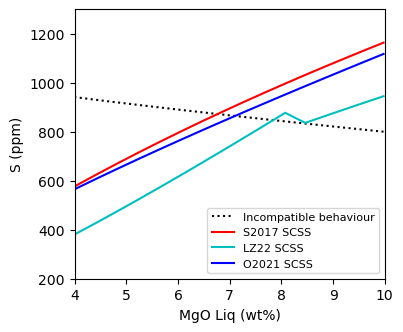

In [10]:
f, a = plt.subplots(1,1, figsize = (4, 3.5))
a.plot(df_Petro['MgO_Liq'], FC, ':k', label = 'Incompatible behaviour')
a.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'], 
       '-r', label = "S2017 SCSS")
a.plot(LZ2022_FixedSulf['MgO_Liq'], LZ2022_FixedSulf['SCSS_Tot'], 
       '-c', label = "LZ22 SCSS")
a.plot(ONeill_FixedSulf['MgO_Liq'], ONeill_FixedSulf['SCSS2_ppm'], 
       '-b', label = "O2021 SCSS")

a.set_ylabel('S (ppm)')
a.set_xlabel('MgO Liq (wt%)')
a.legend(fontsize = 8, loc = "lower right")
plt.xlim([4, 10])
plt.ylim([200, 1300])

In [11]:
LZ2022_FixedSulf

,SCSS_Tot,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,...,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,944.864154,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,...,0.162217,0.062247,0.000777,0.136726,0.117978,0.044478,0.002341,0.000777,0.0,0.006800
1,918.799931,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,...,0.164017,0.062150,0.000786,0.131793,0.119288,0.044970,0.002367,0.000785,0.0,0.006741
2,891.807650,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,...,0.165874,0.062014,0.000794,0.126734,0.120638,0.045480,0.002394,0.000794,0.0,0.006683
3,864.417345,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,...,0.167752,0.061838,0.000804,0.121653,0.122003,0.045995,0.002421,0.000803,0.0,0.006629
4,836.086510,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,...,0.169687,0.061614,0.000813,0.116452,0.123411,0.046526,0.002449,0.000813,0.0,0.006577
5,877.236753,50.4140,1.0505,15.7581,8.781031,0.1051,8.0733,12.6064,2.6263,0.2101,...,0.171645,0.061343,0.000823,0.111232,0.124835,0.047061,0.002477,0.000822,0.0,0.006527
6,826.551678,50.5260,1.0617,15.9260,8.722929,0.1062,7.6778,12.7408,2.6543,0.2123,...,0.173662,0.061014,0.000832,0.105898,0.126302,0.047614,0.002506,0.000832,0.0,0.006479
7,775.792778,50.6413,1.0732,16.0973,8.657306,0.1073,7.2788,12.8779,2.6829,0.2146,...,0.175720,0.060626,0.000842,0.100503,0.127799,0.048179,0.002536,0.000841,0.0,0.006432
8,725.079922,50.7601,1.0848,16.2721,8.583754,0.1085,6.8766,13.0177,2.7120,0.2170,...,0.177819,0.060172,0.000852,0.095052,0.129326,0.048755,0.002567,0.000852,0.0,0.006388
9,674.077766,50.8836,1.0968,16.4521,8.500401,0.1097,6.4681,13.1617,2.7420,0.2194,...,0.179981,0.059642,0.000862,0.089502,0.130898,0.049347,0.002598,0.000862,0.0,0.006343


In [12]:
df_Petro['Ni_Liq (ppm)'] = np.zeros(len(df_Petro['SiO2_Liq'])) + 150
df_Petro['Cu_Liq (ppm)'] = np.zeros(len(df_Petro['SiO2_Liq'])) + 15

S17_SCSS_S17_Sulf = ss.calculate_S2017_SCSS(df = df_Petro,
                                            Fe_FeNiCu_Sulf = "Calc_Smythe",
                                            T_K = df_Petro['T_K'],
                                            P_kbar = df_Petro['P_kbar'],
                                            Fe3Fet_Liq = df_Petro['Fe3Fet_Liq'],
                                            Ni_Liq = df_Petro['Ni_Liq (ppm)'],
                                            Cu_Liq = df_Petro['Cu_Liq (ppm)'])

Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq',
       'Ni_Liq_ppm', 'Cu_Liq_ppm', 'SiO2_magma', 'TiO2_magma', 'Al2O3_magma',
       'Fe2O3_magma', 'FeO_magma', 'MnO_magma', 'MgO_magma', 'CaO_magma',
       'Na2O_magma', 'K2O_magma', 'P2O5_magma', 'Cr2O3_magma', 'Ni_magma',
       'Cu_magma', 'Cr2O3_Liq', 'Ni_Liq', 'Cu_Liq', 'SiO2_cumulate',
       'TiO2_cumulate', 'Al2O3_cumulate', 'Fe2O3_cumulate', 'FeO_cumulate',
       'MnO_cumulate', 'MgO_cumulate', 'CaO_cumulate', 'Na2O_cumulate',
       'K2O_cumulate', 'P2O5_cumulate', 'Cr2O3_cumulate', 'Ni_cumulate',
       'Cu_cumulate', 'Temperature', 'Temperature_Olv', 'Olv_Fo_magma',
       'Olv_Kd', 'Olv_Fo_cumulate', 'Pressure(kbar)', 'Lg(fO2)', 'dNNO',
       'density', 'Ln(viscosity)', 'Melt_%_magma', 'Olv_%_magma',
       'Olv_Peritectic', 'Fluid_%_magma', 'Olv_%_cumulate', 'Sample',
       'Unnamed:58', 'T_K', 'P_kbar', 'Fractio

In [13]:
O21_SCSS_S17_Sulf = ss.calculate_O2021_SCSS(df=df_Petro,
                                            Fe_FeNiCu_Sulf = "Calc_Smythe",
                                            T_K = df_Petro['T_K'],
                                            P_kbar = df_Petro['P_kbar'],
                                            Fe3Fet_Liq = df_out['Fe3Fet_Liq'],
                                            Ni_Liq = df_Petro['Ni_Liq (ppm)'],
                                            Cu_Liq = df_Petro['Cu_Liq (ppm)'])

In [14]:
F2015_3H = ss.calculate_F2015_SCSS(df = df_Petro,
                                   T_K = df_Petro['T_K'],
                                   P_kbar = df_Petro['P_kbar'],
                                   H2O_Liq = 3)

In [15]:
S_Frac = ss.calculate_mass_frac_sulf(S_model = ONeill_FixedSulf['SCSS2_ppm'],
                                     S_sulf = 320000, S_init = 80,
                                     F_melt = df_Petro['Melt_%_magma']/100)

In [16]:
CD19_SCAS=ss.calculate_CD2019_SCAS(df = df_Petro,
                                   T_K = df_Petro['T_K'])
CD19_SCAS.head()

,SCAS6_ppm,lnXS,Xs,molesS,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,...,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,H2O_Liq_mol_frac,Cr2O3_Liq_mol_frac
0,22381.770953,-3.173787,0.041845,0.069801,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,...,0.000869,0.077174,0.131863,0.090654,0.024856,0.001308,0.007714,0.0,0.0,0.0
1,24252.043336,-3.093293,0.045352,0.075634,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,...,0.000879,0.077100,0.133501,0.091780,0.025164,0.001324,0.007810,0.0,0.0,0.0
2,26332.709650,-3.010922,0.049246,0.082123,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,...,0.000890,0.076986,0.135194,0.092944,0.025484,0.001341,0.007909,0.0,0.0,0.0
3,28603.678810,-2.928343,0.053486,0.089205,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,...,0.000902,0.076833,0.136911,0.094125,0.025808,0.001359,0.008010,0.0,0.0,0.0
4,31130.910816,-2.844053,0.058189,0.097087,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,...,0.000914,0.076631,0.138687,0.095345,0.026142,0.001376,0.008114,0.0,0.0,0.0


In [17]:
ZT22_SCAS=ss.calculate_ZT2022_SCAS(df = df_Petro,
                                   T_K = df_Petro['T_K'])
ZT22_SCAS.head()

,SCAS6_ppm,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,...,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq,Ni_Liq (ppm),Cu_Liq (ppm)
0,8800.801280,49.9010,0.9981,14.9715,8.980926,0,9.9763,11.9772,2.4953,0.1996,...,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0,150.0,15.0
1,8329.162079,49.9978,1.0081,15.1220,8.951296,0,9.6064,12.0976,2.5203,0.2016,...,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1,150.0,15.0
2,7866.305310,50.0982,1.0185,15.2770,8.916645,0,9.2279,12.2216,2.5462,0.2037,...,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2,150.0,15.0
3,7420.997354,50.2003,1.0289,15.4337,8.877334,0,8.8486,12.3469,2.5723,0.2058,...,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.969959,3,150.0,15.0
4,6983.909186,50.3062,1.0397,15.5950,8.832002,0,8.4612,12.4760,2.5992,0.2079,...,0,4.0077,PetrologDefault,08:21:15,1484.230,1,0.959923,4,150.0,15.0


In [18]:
S6St_03 = ss.calculate_S6St_Jugo2010_eq10(deltaQFM = 0.3)
S6St_03

0.030653430031715508

In [19]:
deltaQFM = np.linspace(-1, 3, 10001)
S6St = ss.calculate_S6St_Jugo2010_eq10(deltaQFM =deltaQFM)
S6St

array([7.94265144e-05, 7.95729466e-05, 7.97196488e-05, ...,
       9.99873659e-01, 9.99873891e-01, 9.99874123e-01])

In [20]:
S6 = ss.calculate_S6St_Jugo2010_eq10(deltaQFM = 1)
SCSS_Tot = ss.calculate_SCSS_Total(SCSS = 1000, S6St_Liq = S6)
SCSS_Tot

1794.3282347242814

In [21]:
SCAS_Tot = ss.calculate_SCAS_Total(SCAS = 5000, S6St_Liq = 0.988)
SCAS_Tot

5060.728744939272

In [22]:
deltaQFM_lin = np.linspace(-1, 3, 10)
df_S_Jugo = ss.calculate_S_Total_SCSS_SCAS(deltaQFM = deltaQFM_lin, SCSS = 1000, SCAS = 5000, model = 'Jugo')
df_S_Jugo

,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1000.079433,1000.000000,0.079433,-1.000000,0.000079,1000,5000,1.000079e+03,6.295127e+07,7.943282e-02,6.294627e+07
1,1000.615020,1000.000000,0.615020,-0.555556,0.000615,1000,5000,1.000615e+03,8.134823e+06,6.150195e-01,8.129823e+06
2,1004.761873,1000.000000,4.761873,-0.111111,0.004739,1000,5000,1.004762e+03,1.055007e+06,4.761873e+00,1.050007e+06
3,1036.869451,1000.000000,36.869451,0.333333,0.035558,1000,5000,1.036869e+03,1.406136e+05,3.686945e+01,1.356136e+05
4,1285.466766,1000.000000,285.466766,0.777778,0.222072,1000,5000,1.285467e+03,2.251517e+04,2.854668e+02,1.751517e+04
5,3210.265498,1000.000000,2210.265498,1.222222,0.688499,1000,5000,3.210265e+03,7.262172e+03,2.210265e+03,2.262172e+03
6,5292.170707,292.170707,5000.000000,1.666667,0.944792,1000,5000,1.811328e+04,5.292171e+03,1.711328e+04,2.921707e+02
7,5037.735298,37.735298,5000.000000,2.111111,0.992509,1000,5000,1.335019e+05,5.037735e+03,1.325019e+05,3.773530e+01
8,5004.873701,4.873701,5000.000000,2.555556,0.999026,1000,5000,1.026914e+06,5.004874e+03,1.025914e+06,4.873701e+00
9,5000.629463,0.629463,5000.000000,3.000000,0.999874,1000,5000,7.944282e+06,5.000629e+03,7.943282e+06,6.294627e-01


In [23]:
calc_Nash_S6 = ss.calculate_S6St_Nash2019(T_K = df_Petro['T_K'], Fe3Fet_Liq = df_Petro['Fe3Fet_Liq'])
calc_Nash_S6

0     1.504957e-02
1     1.215564e-02
2     9.777336e-03
3     7.880103e-03
4     6.324274e-03
5     5.076931e-03
6     4.061151e-03
7     3.238875e-03
8     2.576747e-03
9     2.036309e-03
10    1.604760e-03
11    1.252201e-03
12    9.671998e-04
13    7.387243e-04
14    5.533246e-04
15    4.059280e-04
16    2.891762e-04
17    1.979444e-04
18    1.289881e-04
19    7.850534e-05
20    4.390692e-05
21    2.183436e-05
22    9.381416e-06
23    3.296609e-06
24    8.921133e-07
25    1.723920e-07
26    2.095568e-08
27    1.329180e-09
28    3.115539e-11
29    1.105974e-13
30    5.275392e-19
dtype: float64

In [25]:
deltaQFM_lin = np.linspace(-1, 3, 11)
df_S_Nash = ss.calculate_S_Total_SCSS_SCAS(SCSS = 1000, SCAS = 5000, 
                                           model = 'Nash', T_K = df_Petro['T_K'],
                                           Fe3Fet_Liq = df_out['Fe3Fet_Liq'])

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
deltaQFM_lin = np.linspace(-1, 3, 11)
df_S_Klein = ss.calculate_S_Total_SCSS_SCAS(deltaQFM = deltaQFM_lin, SCSS = 1000, SCAS = 5000, model = 'Kleinsasser')
df_S_Klein

,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1000.008913,NaN,NaN,-1.0,NaN,1000,5000,1000.008913,135247.685713,0.008913,130247.685713
1,1000.056234,NaN,NaN,-0.6,NaN,1000,5000,1000.056234,63524.057700,0.056234,58524.057700
2,1000.354813,NaN,NaN,-0.2,NaN,1000,5000,1000.354813,31296.554222,0.354813,26296.554222
3,1002.238721,NaN,NaN,0.2,NaN,1000,5000,1002.238721,16815.803469,2.238721,11815.803469
4,1014.125375,NaN,NaN,0.6,NaN,1000,5000,1014.125375,10309.182733,14.125375,5309.182733
5,1089.125094,NaN,NaN,1.0,NaN,1000,5000,1089.125094,7385.569578,89.125094,2385.569578
6,1562.341325,NaN,NaN,1.4,NaN,1000,5000,1562.341325,6071.905507,562.341325,1071.905507
7,4548.133892,NaN,NaN,1.8,NaN,1000,5000,4548.133892,5481.638191,3548.133892,481.638191
8,5216.413990,NaN,NaN,2.2,NaN,1000,5000,23387.211386,5216.413990,22387.211386,216.413990
9,5097.241074,NaN,NaN,2.6,NaN,1000,5000,142253.754462,5097.241074,141253.754462,97.241074


In [27]:
help(ss.calculate_OM2022_S6St)

Help on function calculate_OM2022_S6St in module PySulfSat.s6_corrections:

calculate_OM2022_S6St(df, T_K, logfo2=None, Fe3Fet_Liq=None)
    Calculates S6/ST (as well as ln Cs2- and ln Cs6+) Using ONeill and Mavrogenes (2022)
    
    Parameters
    -----------
    df: pandas Dataframe
        input dataframe of liquid compositions with _Liq after each oxide
    
    
    T_K: int, float, pd.series
        Temperature in Kelvin
    
    
    Fe3Fet_Liq: int, float, pd.Series
        Fe3Fet ratio in the liquid
    
    OR
    
    logfo2: int, float, pd.Series
        logfo2 value
    
    Returns
    -----------
    
    pd.DataFrame: Contains S6/ST, Cs2- and Cs6+, and all intermediate calculations + user inputs



In [28]:
Calc_OM2022 = ss.calculate_OM2022_S6St(df = df_out, 
                                       T_K = df_out['T_K'],
                                       logfo2 = df_out['logfo2'])

In [29]:
Calc_OM2022 = ss.calculate_OM2022_S6St(df = df_Petro, 
                                       T_K = df_Petro['T_K'],
                                       Fe3Fet_Liq = df_Petro['Fe3Fet_Liq'])
Calc_OM2022.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.010815,-2.202857,12.717791,-16.307958,-4.515928,0.070616,49.9010,0.9981,14.9715,8.980926,...,0.117978,0.162217,0.044478,0.002341,0.006902,0.000777,0.664440,0.687150,-7.761827,0.062247
1,0.009048,-2.291531,12.841584,-16.541783,-4.696094,0.041201,49.9978,1.0081,15.1220,8.951296,...,0.119288,0.164017,0.044970,0.002367,0.006978,0.000785,0.656710,0.679537,-7.897861,0.062150
2,0.007578,-2.386549,12.973861,-16.791165,-4.874920,0.012558,50.0982,1.0185,15.2770,8.916645,...,0.120638,0.165874,0.045480,0.002394,0.007058,0.000794,0.648476,0.671438,-8.040201,0.062014
3,0.006390,-2.486488,13.112564,-17.052315,-5.046569,-0.014195,50.2003,1.0289,15.4337,8.877334,...,0.122003,0.167752,0.045995,0.002421,0.007137,0.000803,0.639869,0.662987,-8.186003,0.061838
4,0.005400,-2.593890,13.261190,-17.331682,-5.215929,-0.039894,50.3062,1.0397,15.5950,8.832002,...,0.123411,0.169687,0.046526,0.002449,0.007220,0.000813,0.630682,0.653976,-8.339038,0.061614


In [30]:
Tot_S_S17_Z19 = ss.calculate_S_Total_SCSS_SCAS(SCSS = Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
                                               SCAS = CD19_SCAS['SCAS6_ppm'], S6St_Liq = 0.2)
Tot_S_S17_Z19

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1454.540158,1163.632126,290.908032,None,0.2,1163.632126,22381.770953,1454.540158,111908.854765,290.908032,89527.083812
1,1415.234565,1132.187652,283.046913,None,0.2,1132.187652,24252.043336,1415.234565,121260.216678,283.046913,97008.173342
2,1374.404984,1099.523987,274.880997,None,0.2,1099.523987,26332.709650,1374.404984,131663.548251,274.880997,105330.838601
3,1332.848797,1066.279038,266.569759,None,0.2,1066.279038,28603.678810,1332.848797,143018.394052,266.569759,114414.715242
4,1289.668942,1031.735153,257.933788,None,0.2,1031.735153,31130.910816,1289.668942,155654.554078,257.933788,124523.643262
5,1245.613923,996.491139,249.122785,None,0.2,996.491139,33889.469924,1245.613923,169447.349618,249.122785,135557.879695
6,1199.837967,959.870374,239.967593,None,0.2,959.870374,36958.113440,1199.837967,184790.567202,239.967593,147832.453762
7,1152.678483,922.142787,230.535697,None,0.2,922.142787,40336.061336,1152.678483,201680.306679,230.535697,161344.245343
8,1104.131302,883.305041,220.826260,None,0.2,883.305041,44049.136408,1104.131302,220245.682041,220.826260,176196.545633
9,1053.700773,842.960618,210.740155,None,0.2,842.960618,48164.827145,1053.700773,240824.135723,210.740155,192659.308579


In [31]:
Tot_S_S17_Z19_Nash = ss.calculate_S_Total_SCSS_SCAS(SCSS = Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
                                               SCAS = CD19_SCAS['SCAS6_ppm'], 
                                                    Fe3Fet_Liq = df_Petro['Fe3Fet_Liq'],
                                                    model = 'Nash', 
                                                    T_K = df_Petro['T_K'])
Tot_S_S17_Z19_Nash

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1181.411865,1163.632126,1.777974e+01,None,1.504957e-02,1163.632126,22381.770953,1181.411865,1.487203e+06,1.777974e+01,1.464822e+06
1,1146.119468,1132.187652,1.393182e+01,None,1.215564e-02,1132.187652,24252.043336,1146.119468,1.995127e+06,1.393182e+01,1.970875e+06
2,1110.380551,1099.523987,1.085656e+01,None,9.777336e-03,1099.523987,26332.709650,1110.380551,2.693240e+06,1.085656e+01,2.666907e+06
3,1074.748164,1066.279038,8.469126e+00,None,7.880103e-03,1066.279038,28603.678810,1074.748164,3.629861e+06,8.469126e+00,3.601257e+06
4,1038.301658,1031.735153,6.566504e+00,None,6.324274e-03,1031.735153,31130.910816,1038.301658,4.922448e+06,6.566504e+00,4.891317e+06
5,1001.576072,996.491139,5.084933e+00,None,5.076931e-03,996.491139,33889.469924,1001.576072,6.675188e+06,5.084933e+00,6.641298e+06
6,963.784448,959.870374,3.914074e+00,None,4.061151e-03,959.870374,36958.113440,963.784448,9.100404e+06,3.914074e+00,9.063446e+06
7,925.139197,922.142787,2.996410e+00,None,3.238875e-03,922.142787,40336.061336,925.139197,1.245373e+07,2.996410e+00,1.241339e+07
8,885.586975,883.305041,2.281934e+00,None,2.576747e-03,883.305041,44049.136408,885.586975,1.709486e+07,2.281934e+00,1.705081e+07
9,844.680649,842.960618,1.720031e+00,None,2.036309e-03,842.960618,48164.827145,844.680649,2.365301e+07,1.720031e+00,2.360484e+07


In [32]:
len(Smythe_FixedSulf)

31

In [33]:
import Thermobar as pt
Buffer_calc = pt.convert_fo2_to_buffer(fo2 = 10**df_Petro['Lg(fO2)'],
                                       T_K = df_Petro['T_K'], P_kbar = df_Petro['P_kbar'])

In [34]:
ss.calculate_S_Total_SCSS_SCAS(deltaQFM = Buffer_calc['DeltaQFM_Frost1991'],
                               SCSS = Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
                               SCAS = CD19_SCAS['SCAS6_ppm'],
                               T_K = df_Petro['T_K'],
                               model = 'Jugo')

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1169.857388,1163.632126,6.225262,-0.085829,0.005321,1163.632126,22381.770953,1169.857388,4.206005e+06,6.225262,4.183623e+06
1,1138.143086,1132.187652,5.955434,-0.089502,0.005233,1132.187652,24252.043336,1138.143086,4.634808e+06,5.955434,4.610556e+06
2,1105.398524,1099.523987,5.874536,-0.086116,0.005314,1099.523987,26332.709650,1105.398524,4.954968e+06,5.874536,4.928635e+06
3,1072.209449,1066.279038,5.930411,-0.077393,0.005531,1066.279038,28603.678810,1072.209449,5.171502e+06,5.930411,5.142899e+06
4,1037.394378,1031.735153,5.659225,-0.080406,0.005455,1031.735153,31130.910816,1037.394378,5.706617e+06,5.659225,5.675486e+06
5,1002.044831,996.491139,5.553692,-0.076946,0.005542,996.491139,33889.469924,1002.044831,6.114629e+06,5.553692,6.080740e+06
6,965.300422,959.870374,5.430048,-0.073704,0.005625,959.870374,36958.113440,965.300422,6.570049e+06,5.430048,6.533091e+06
7,927.422436,922.142787,5.279649,-0.071097,0.005693,922.142787,40336.061336,927.422436,7.085427e+06,5.279649,7.045091e+06
8,888.431160,883.305041,5.126118,-0.068161,0.005770,883.305041,44049.136408,888.431160,7.634359e+06,5.126118,7.590310e+06
9,847.990068,842.960618,5.029450,-0.062143,0.005931,842.960618,48164.827145,847.990068,8.120828e+06,5.029450,8.072663e+06


In [36]:
ss.calculate_S_Total_SCSS_SCAS(df=df_Petro,
                               logfo2 = df_Petro['Lg(fO2)'],
                               SCSS = Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
                               SCAS = CD19_SCAS['SCAS6_ppm'],
                               T_K = df_Petro['T_K'],
                               model = 'OM2022')

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1179.032345,1163.632126,15.400218,None,0.013062,1163.632126,22381.770953,1179.032345,1.713536e+06,15.400218,1.691154e+06
1,1146.280914,1132.187652,14.093262,None,0.012295,1132.187652,24252.043336,1146.280914,1.972549e+06,14.093262,1.948297e+06
2,1112.790664,1099.523987,13.266677,None,0.011922,1099.523987,26332.709650,1112.790664,2.208752e+06,13.266677,2.182419e+06
3,1079.039354,1066.279038,12.760316,None,0.011826,1066.279038,28603.678810,1079.039354,2.418788e+06,12.760316,2.390184e+06
4,1043.314130,1031.735153,11.578977,None,0.011098,1031.735153,31130.910816,1043.314130,2.805025e+06,11.578977,2.773894e+06
5,1007.275904,996.491139,10.784765,None,0.010707,996.491139,33889.469924,1007.275904,3.165210e+06,10.784765,3.131321e+06
6,969.850887,959.870374,9.980513,None,0.010291,959.870374,36958.113440,969.850887,3.591384e+06,9.980513,3.554426e+06
7,931.305702,922.142787,9.162915,None,0.009839,922.142787,40336.061336,931.305702,4.099700e+06,9.162915,4.059364e+06
8,891.682245,883.305041,8.377204,None,0.009395,883.305041,44049.136408,891.682245,4.688657e+06,8.377204,4.644607e+06
9,850.672188,842.960618,7.711569,None,0.009065,842.960618,48164.827145,850.672188,5.313118e+06,7.711569,5.264953e+06


In [37]:
Modes = pd.DataFrame(data = {'ol': 0.6,
                             'opx': 0.2,
                             'cpx': 0.18,
                             'sp': 0.02,
                             'gt': 0},
                     index = [0])

In [38]:
KDs_Cu = pd.DataFrame(data = {'element': 'Cu',
                              'ol':0.048, 
                              'opx': 0.034,
                              'cpx':0.043,
                              'sp': 0.223,
                              'gt': 0,
                              'sulf': 800},
                      index = [0])

In [39]:
KDs_Ba = pd.DataFrame(data = {'element': 'Ba',
                              'ol':0.000005, 
                              'opx': 0.000006,
                              'cpx':0.0004,
                              'sp': 0.223,
                              'gt': 0.0007,
                              'sulf': 0},
                      index = [0])

In [40]:
df_Cu_200S = ss.Lee_Wieser_sulfide_melting(N = 3000,
                                           Modes = Modes,
                                           KDs = KDs_Cu,
                                           S_Mantle = 200,
                                           S_Sulf = 360000,
                                           S_Melt_SCSS_2_ppm = 100,
                                           elem_Per = 30,
                                           Prop_S6 = 0)

In [41]:
df_Ba_200S = ss.Lee_Wieser_sulfide_melting(N = 3000,
                                           Modes = Modes,
                                           KDs = KDs_Ba,
                                           S_Mantle = 200,
                                           S_Sulf = 360000,
                                           S_Melt_SCSS_2_ppm = 100,
                                           elem_Per = 6.85,
                                           Prop_S6 = 0)